In [ ]:
from deepqnet import *
from util import *

import gymnasium as gym
import matplotlib.pyplot as plt

# Training

In [26]:
env = make_env('./base_config.pkl')

action_space = env.action_space
observation_space = env.observation_space

gamma = 0.99
batch_size = 12
buffer_capacity = 10000
#update_target_every = 100
tau = 0.005

epsilon_start = 0.6
decrease_epsilon_factor = 300
epsilon_min = 0.05

learning_rate = 1e-2

arguments = (
    action_space,
    observation_space,
    gamma,
    batch_size,
    buffer_capacity,
    tau,
    #update_target_every,
    epsilon_start,
    decrease_epsilon_factor,
    epsilon_min,
    learning_rate,
)

agent = DQN(*arguments)
agent.q_net.to('cuda')
agent.target_net.to('cuda')
output = train(env, agent, 600, 'cuda')

Episode 1/600: 4it [00:00, 38.92it/s]

Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


Checkpoint saved to checkpoint.pth


## Training Results

Below is a plot of episode duration (blue) across 600 training episodes, with a running average in orange.

- **Early Episodes (0–50):** The average duration hovers near zero because the agent frequently fails or terminates quickly (e.g., collisions).
- **Mid Training (50–300):** We see a steady upward trend in the running average, indicating the agent learns to survive/drive longer. Individual episode durations (blue points) are highly variable: some are very short, while others exceed 50 steps.
- **Later Episodes (300+):** The average peaks around 40 steps and remains there, suggesting the agent has learned a reasonably stable policy. However, there's still fluctuation: some episodes end quickly, others last the full 60 steps (the maximum in the environment).

Overall, the orange curve indicates **significant improvement** from near‐immediate termination to consistently lasting around 40 steps on average.


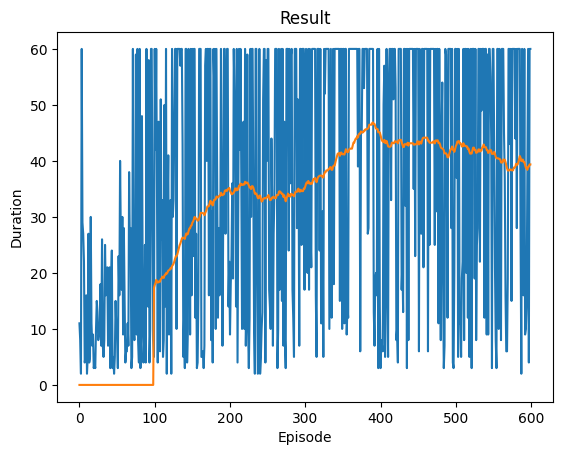

In [28]:
plot_durations(output['durations'])
plt.show()